# AVANCE 3 PROYECTO INTEGRADOR

### CARGA DE ARCHIVOS

In [51]:
# IMPORTACION DE LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#IMPORTACION DE CSV

categories_df = pd.read_csv('categories.csv')
cities_df = pd.read_csv('cities.csv')
countries_df = pd.read_csv('countries.csv')
customers_df = pd.read_csv('customers.csv')
employees_df = pd.read_csv('employees.csv')
products_df = pd.read_csv('products.csv')
sales_df = pd.read_csv('sales.csv')


In [40]:
# INFORMACION DE TABLA
print('-------------TABLA CATEGORIAS-----------')
print(categories_df.info())
print('-------------TABLA CITIES---------------')
print(cities_df.info())
print('-------------TABLA COUNTRIES------------')
print(countries_df.info())
print('-------------TABLA CUSTUMERS------------')
print(customers_df.info())
print('-------------TABLA EMPLOYEES------------')
print(employees_df.info())
print('-------------TABLA PRODUCTS-------------')
print(products_df.info())
print('-------------TABLA SALES----------------')
print(sales_df.info())

-------------TABLA CATEGORIAS-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    11 non-null     int64 
 1   CategoryName  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes
None
-------------TABLA CITIES---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityID     96 non-null     int64 
 1   CityName   96 non-null     object
 2   Zipcode    96 non-null     int64 
 3   CountryID  96 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ KB
None
-------------TABLA COUNTRIES------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------

### PREGUNTA 1
El notebook se debe entregar y debe ser posible visualizar los resultados de cada pregunta:

El campo TotalPrice en la tabla sales no tiene valores válidos. Utilizando la información de precios de la tabla products, calcula el valor real de la venta para cada registro y almacena en una nueva columna

Utiliza la siguiente fórmula:

TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)

In [41]:
df = sales_df.merge(products_df[['ProductID', 'Price']], on='ProductID', how='left')
df['TotalPriceCalculated'] = (df['Quantity']*df['Price']) * (1 - df['Discount'])
df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,TotalPriceCalculated
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,309.63590
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,437.82200
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,1896.44160
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,1236.01384
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,719.80200


## PREGUNTA 2

Detecta los outliers en la columna de ventas totales (TotalPriceCalculated)
Utilizando el criterio del rango intercuartílico (IQR). Luego, crea una nueva columna llamada IsOutlier que tenga el valor 1 si el registro es un outlier y 0 en caso contrario. 

##### QUE ES EL RANGO INTERCUARTILICO
El rango intercuartílico (IQR) es una medida estadística que describe la dispersión de los datos, mostrando el rango dentro del cual se encuentra el 50% central de los valores.
Formula de rango intercuartílico:  

        IQR=Q3−Q1

FORMULA PARA LIMITE SUPERIOR - LIMITE INFERIOR 

        limite inferior = Q1−1.5×IQR
        limite superior = Q3+1.5×IQR
Un valor se considera atípico si está fuera del rango:

        TotalPrice < LimiteInferior  o  TotalPrice > Limite Superior

¿Cuántos outliers se detectaron?

Rango intercuartilico de Calculo de precio total: 805.2203999999999


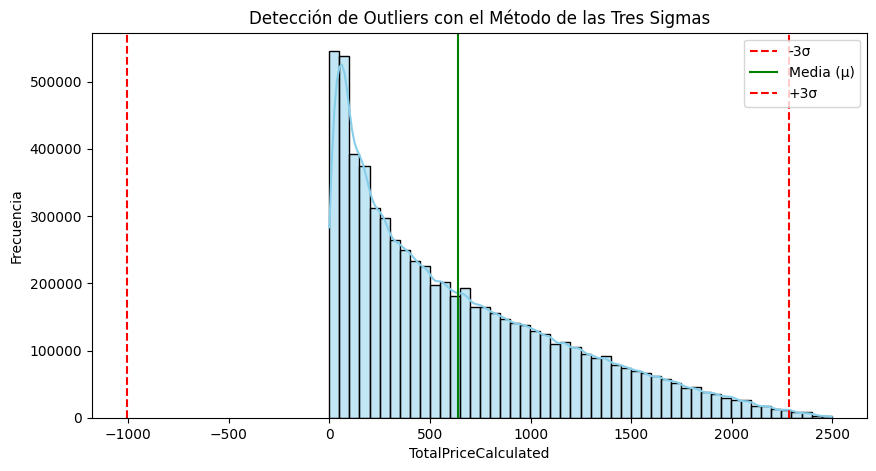

In [53]:
#Calculo de rango intercuartilico   

Q1 = df['TotalPriceCalculated'].quantile(0.25)  #representacion del 25%
Q3 = df['TotalPriceCalculated'].quantile(0.75)  #representacion del 75%

IQR = Q3 - Q1

print(f'Rango intercuartilico de Calculo de precio total: {IQR}')

# Calcular media y desviación estándar
media = df['TotalPriceCalculated'].mean()
std = df['TotalPriceCalculated'].std()

# Umbrales de 3 sigmas
lower = media - 3*std
upper = media + 3*std

# Crear la gráfica de distribución
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalPriceCalculated'], kde=True, color='skyblue', bins=50)

# Agregar líneas de umbral de 3 sigmas
plt.axvline(lower, color='red', linestyle='--', label='-3σ')
plt.axvline(media, color='green', linestyle='-', label='Media (μ)')
plt.axvline(upper, color='red', linestyle='--', label='+3σ')

# Título y etiquetas
plt.title('Detección de Outliers con el Método de las Tres Sigmas')
plt.xlabel('TotalPriceCalculated')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar
plt.show()

In [43]:
##Limites superior e inferior

low = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

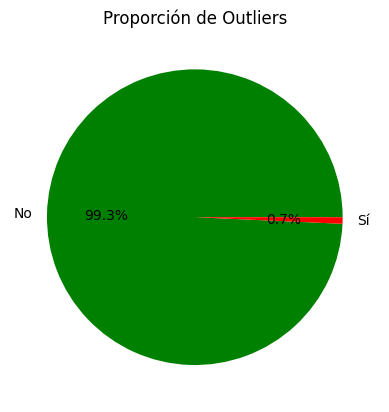

Outlier
False    6709908
True       48217
Name: count, dtype: int64


In [47]:
#Calculo para considerar valores atipicos

df['Outlier'] = ((df['TotalPriceCalculated'] < low) | (df['TotalPriceCalculated'] > upper))
total_outliners = df['Outlier'].value_counts()
counts = df['Outlier'].value_counts()
# Gráfico de pastel
counts.plot(kind='pie', labels=['No', 'Sí'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proporción de Outliers')
plt.ylabel('')
plt.show()

print(total_outliners)

### PREGUNTA 3

3.1 - A partir de la columna SalesDate, crea una nueva columna que contenga únicamente la hora de la venta.

3.2 - identifica en qué hora del día se concentran más ventas totales (TotalPriceCalculated).

3.3 ¿La empresa vende más durante los días de semana o en el fin de semana? 

Utiliza la columna SalesDate para identificar el día de la semana de cada venta, clasifica los registros como Entre semana o Fin de semana, y compara el total de ventas (TotalPriceCalculated) entre ambos grupos.

In [55]:
#Tranformacion de dtype datetime
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

In [59]:
#Creacion de columna unica de hora de venta 3.1

df['hours'] = df['SalesDate'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   SalesID               int64         
 1   SalesPersonID         int64         
 2   CustomerID            int64         
 3   ProductID             int64         
 4   Quantity              int64         
 5   Discount              float64       
 6   TotalPrice            float64       
 7   SalesDate             datetime64[ns]
 8   TransactionNumber     object        
 9   Price                 float64       
 10  TotalPriceCalculated  float64       
 11  Outlier               bool          
 12  Hours                 float64       
 13  hours                 float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int64(5), object(1)
memory usage: 676.7+ MB


    hours  TotalPriceCalculated
16   16.0          1.790144e+08


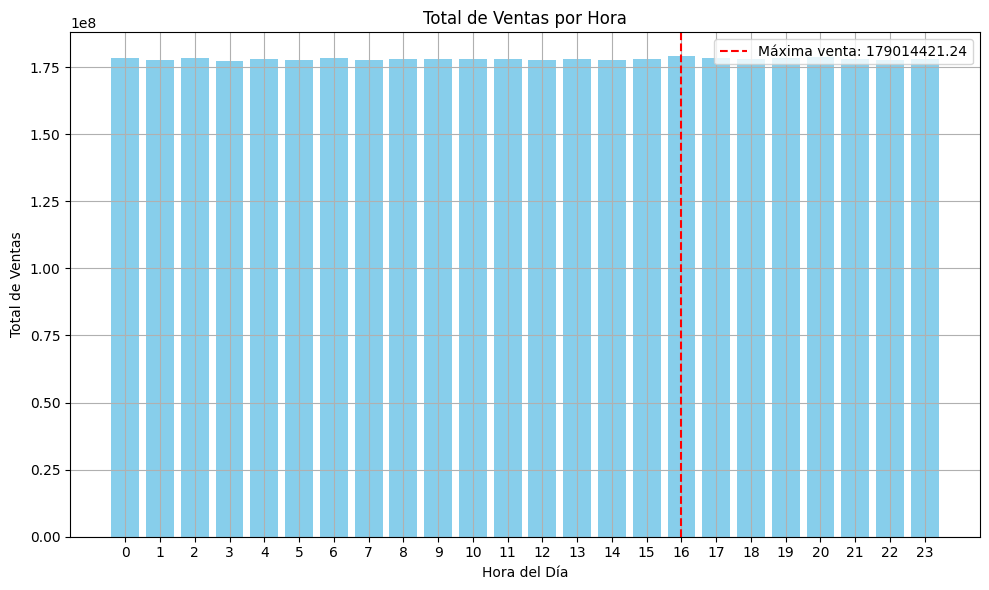

In [66]:
#Identificacion de hora donde se concentran mas ventas

sale_hour = df.groupby('hours')['TotalPriceCalculated'].sum().reset_index() # Agrupacion de las horas con las ventas totales
max_hour_sale = sale_hour[sale_hour['TotalPriceCalculated'] == sale_hour['TotalPriceCalculated'].max()] #Busca el resultado maximo del grupo de  horas 
print(max_hour_sale)

# Crear una gráfica de barras
plt.figure(figsize=(10,6))
plt.bar(sale_hour['hours'], sale_hour['TotalPriceCalculated'], color='skyblue')

# Marcar la hora con más ventas
max_hour = max_hour_sale['hours'].values[0]
max_value = max_hour_sale['TotalPriceCalculated'].values[0]
plt.axvline(x=max_hour, color='red', linestyle='--', label=f'Máxima venta: {max_value:.2f}')

# Títulos y etiquetas
plt.title('Total de Ventas por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Ventas')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))  # Si las horas van de 0 a 23

plt.tight_layout()
plt.show()

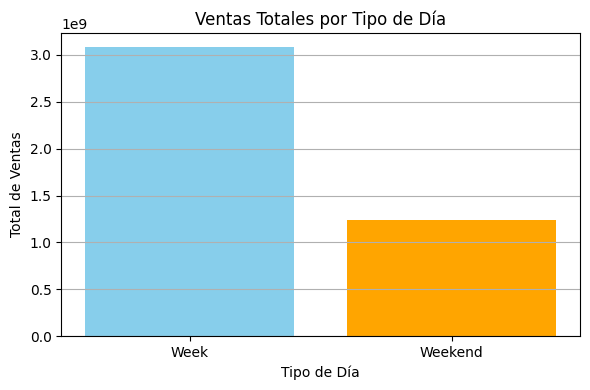

   typeday  TotalPriceCalculated
0     Week          3.080352e+09
1  Weekend          1.235916e+09


In [73]:
#Dia de la semana que mas vende

typeday = []

for day in df['weekday']:
    if day < 5:
        typeday.append('Week')
    else:
        typeday.append('Weekend')

df['typeday'] = typeday

sales_of_day = df.groupby('typeday')['TotalPriceCalculated'].sum().reset_index()


plt.figure(figsize=(6,4))
plt.bar(sales_of_day['typeday'], sales_of_day['TotalPriceCalculated'], color=['skyblue', 'orange'])

plt.title('Ventas Totales por Tipo de Día')
plt.xlabel('Tipo de Día')
plt.ylabel('Total de Ventas')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


print(sales_of_day)

### PREGUNTA 4 

calcula dos nuevas columnas en el dataset de ventas:
La edad del empleado al momento de su contratación y años de experiencia al momento de realizar cada venta.

Utiliza las columnas BirthDate, HireDate (de la tabla employees) y SalesDate (de la tabla sales). 

Asegúrate de trabajar con fechas en formato adecuado.

In [ ]:
#Transformacion de campo birthdate a datatime
employees_df['BirthDate'] = pd.to_datetime(employees_df['BirthDate'])
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EmployeeID     23 non-null     int64         
 1   FirstName      23 non-null     object        
 2   MiddleInitial  23 non-null     object        
 3   LastName       23 non-null     object        
 4   BirthDate      23 non-null     datetime64[ns]
 5   Gender         23 non-null     object        
 6   CityID         23 non-null     int64         
 7   HireDate       23 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.6+ KB


In [76]:
#Transformacion de HireDate a datatime
employees_df['HireDate'] = pd.to_datetime(employees_df['HireDate'])
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EmployeeID     23 non-null     int64         
 1   FirstName      23 non-null     object        
 2   MiddleInitial  23 non-null     object        
 3   LastName       23 non-null     object        
 4   BirthDate      23 non-null     datetime64[ns]
 5   Gender         23 non-null     object        
 6   CityID         23 non-null     int64         
 7   HireDate       23 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.6+ KB


In [79]:
#Edad del empleado al momento de su contratacion

employees_df['employee_age'] = employees_df['HireDate'].dt.year - employees_df['BirthDate'].dt.year
employees_df.head()

,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate,employee_age
0,1,Nicole,T,Fuller,1981-03-07,F,80,2011-06-20 07:15:36.920,30
1,2,Christine,W,Palmer,1968-01-25,F,4,2011-04-27 04:07:56.930,43
2,3,Pablo,Y,Cline,1963-02-09,M,70,2012-03-30 18:55:23.270,49
3,4,Darnell,O,Nielsen,1989-02-06,M,39,2014-03-06 06:55:02.780,25
4,5,Desiree,L,Stuart,1963-05-03,F,23,2014-11-16 22:59:54.720,51


In [82]:
#años de experiencia al momento de realizar cada venta

#Conversion de sales date a datatime
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'])

#union de tablas 
df = sales_df.merge(employees_df, left_on='SalesPersonID', right_on='EmployeeID')

df['experience'] = ((df['SalesDate'] - df['HireDate']).dt.days // 365) + 1

df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate,employee_age,experience
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,6,Holly,E,Collins,1987-01-13,M,65,2013-06-22 13:20:18.080,26,5.0
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,16,Chadwick,U,Walton,1951-07-07,M,28,2017-02-10 11:21:26.650,66,1.0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,13,Katina,Y,Marks,1963-04-18,M,68,2011-12-12 10:43:52.940,48,7.0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,8,Julie,E,Dyer,1956-12-13,M,18,2014-10-14 23:12:53.420,58,4.0
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,10,Jean,P,Vang,1963-12-30,M,9,2012-07-23 15:02:12.640,49,6.0
